## Прямое кодирование слов и символов

In [1]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 
token_index = {} #Создание индекса всех токенов в данных
for sample in samples:
 for word in sample.split(): 
    if word not in token_index:
        token_index[word] = len(token_index) + 1 
max_length = 10
results = np.zeros(shape=(len(samples), max_length,
                    max(token_index.values()) + 1)) 
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [7]:
# import string
# samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# characters = string.printable #Все отображаемые символы ASCII
# token_index = dict(zip(characters, range(1, len(characters) + 1)))
# max_length = 50
# results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
# for i, sample in enumerate(samples):
#     for j, character in enumerate(sample):
#         index = token_index.get(character)
#         results[i, j, index] = 1

In [6]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000) 
tokenizer.fit_on_texts(samples) #Создание индекса всех слов
sequences = tokenizer.texts_to_sequences(samples) 
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') 
word_index = tokenizer.word_index 
print('Found %s unique tokens.' % len(word_index))


Found 9 unique tokens.


In [8]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
 for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1

In [9]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [13]:
from keras.datasets import imdb
from keras.utils import pad_sequences
max_features = 10000 
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
 num_words=max_features) #Загрузка данных как списков целых чисел
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten()) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
 epochs=10,
 batch_size=32,
 validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6674 - acc: 0.6238 - val_loss: 0.6161 - val_acc: 0.6990
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5412 - acc: 0.7485 - val_loss: 0.5258 - val_acc: 0.7342
Epoch 3/10
625/625 [==============================] 

In [17]:
import os
glove_dir = 'C:/Users/igorv/OneDrive/Documents/GitHub/NeuralNetworks/from_book/data/glove.6B'
embeddings_index = {}
filename = os.path.join(glove_dir, 'glove.6B.100d.txt')
with open(filename, 'rb') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [18]:
embedding_dim = 100
max_words = 10000
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           1000000   
                                                                 
 flatten_1 (Flatten)         (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                64032     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,064,065
Trainable params: 1,064,065
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [21]:
x_val, y_val = x_test, y_test
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])
history = model.fit(x_train, y_train,
 epochs=10,
 batch_size=32,
 validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.6932 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.6932 - acc: 0.5039 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6932 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6932 - acc: 0.4995 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6932 - acc: 0.5002 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/10
782/782 [==============================] - 3s 3ms/step - loss: 0.

In [ ]:
# test_dir = os.path.join(imdb_dir, 'test')
# labels = []
# texts = []
# for label_type in ['neg', 'pos']:
#  dir_name = os.path.join(test_dir, label_type)
#  for fname in sorted(os.listdir(dir_name)):
#  if fname[-4:] == '.txt':
#  f = open(os.path.join(dir_name, fname))
#  texts.append(f.read())
#  f.close()
#  if label_type == 'neg':
#  labels.append(0)
#  else:
#  labels.append(1)
# sequences = tokenizer.texts_to_sequences(texts)
# x_test = pad_sequences(sequences, maxlen=maxlen)
# y_test = np.asarray(labels)

In [22]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.6931 - acc: 0.5000


[0.6931484937667847, 0.5]

In [23]:
import numpy as np
timesteps = 100 #Число временных интервалов во входной последовательности
input_features = 32 #Размерность пространства входных признаков
output_features = 64 #Размерность пространства выходных признаков
inputs = np.random.random((timesteps, input_features)) 
state_t = np.zeros((output_features,)) 
W = np.random.random((output_features, input_features)) 
U = np.random.random((output_features, output_features)) 
b = np.random.random((output_features,)) 
successive_outputs = []
for input_t in inputs: #input_t — вектор с формой (входные_признаки,)
 output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) 
 successive_outputs.append(output_t) 
 state_t = output_t 
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [24]:
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) #Последний слой возвращает только последний результат
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [2]:
from keras.datasets import imdb 
from keras.utils import pad_sequences
max_features = 10000 
maxlen = 500 
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
 num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [31]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 100ms/step - loss: 0.6782 - acc: 0.5604 - val_loss: 0.6578 - val_acc: 0.5952
Epoch 2/10
157/157 [==============================] - 14s 90ms/step - loss: 0.4939 - acc: 0.7709 - val_loss: 0.4624 - val_acc: 0.7862
Epoch 3/10
157/157 [==============================] - 14s 90ms/step - loss: 0.3368 - acc: 0.8622 - val_loss: 0.4911 - val_acc: 0.7724
Epoch 4/10
157/157 [==============================] - 14s 89ms/step - loss: 0.2436 - acc: 0.9056 - val_loss: 0.4940 - val_acc: 0.7836
Epoch 5/10
157/157 [==============================] - 13s 85ms/step - loss: 0.1724 - acc: 0.9367 - val_loss: 0.4517 - val_acc: 0.8248
Epoch 6/10
157/157 [==============================] - 14s 92ms/step - loss: 0.1027 - acc: 0.9669 - val_loss: 0.6182 - val_acc: 0.7616
Epoch 7/10
157/157 [==============================] - 14s 90ms/step - loss: 0.0652 - acc: 0.9779 - val_loss: 0.5692 - val_acc: 0.8196
Epoch 8/10
157/157 [==============================] - 14s 88m

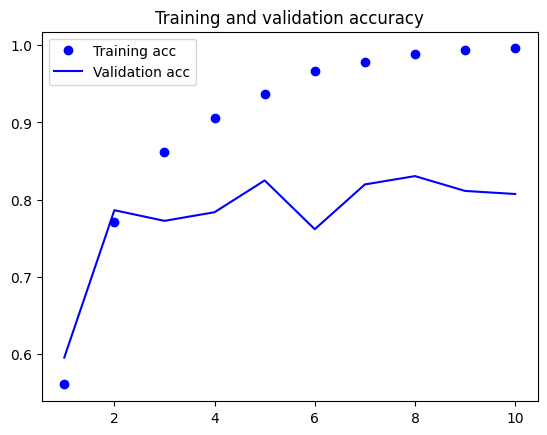

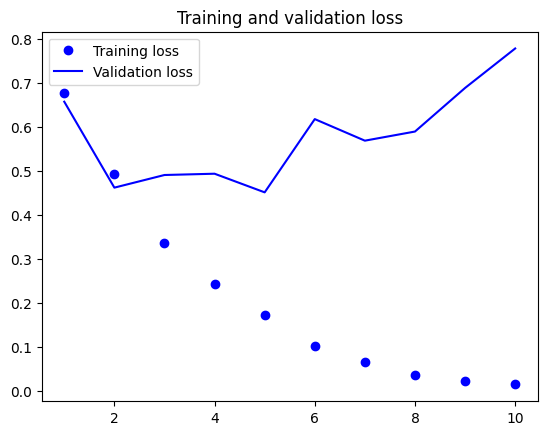

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])
history = model.fit(input_train, y_train,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 39s 231ms/step - loss: 0.6106 - acc: 0.6564 - val_loss: 0.5127 - val_acc: 0.7498
Epoch 2/10
157/157 [==============================] - 36s 229ms/step - loss: 0.3719 - acc: 0.8431 - val_loss: 0.3294 - val_acc: 0.8660
Epoch 3/10
157/157 [==============================] - 37s 234ms/step - loss: 0.2763 - acc: 0.8908 - val_loss: 0.4784 - val_acc: 0.8046
Epoch 4/10
157/157 [==============================] - 35s 224ms/step - loss: 0.2383 - acc: 0.9099 - val_loss: 0.3292 - val_acc: 0.8700
Epoch 5/10
157/157 [==============================] - 36s 229ms/step - loss: 0.2086 - acc: 0.9215 - val_loss: 0.3155 - val_acc: 0.8618
Epoch 6/10
157/157 [==============================] - 34s 214ms/step - loss: 0.1854 - acc: 0.9334 - val_loss: 0.3305 - val_acc: 0.8818
Epoch 7/10
157/157 [==============================] - 35s 226ms/step - loss: 0.1698 - acc: 0.9399 - val_loss: 0.3113 - val_acc: 0.8756
Epoch 8/10
157/157 [==============================] - 3